,Unnamed: 0.1,Unnamed: 0,particle,cell_area,mito_start,mitosis,Texas_Red,Texas_Red_corr,Texas_Red_int_corr,GFP,GFP_bkg_corr,GFP_int_corr
1529,152,152,369,1102.500000,20,4,77.385433,119.613392,0.918823,105.450650,566.757367,0.874268
1735,358,358,839,1095.875000,0,2,77.462832,118.960621,0.920166,102.235971,578.041176,0.893799
1728,351,351,820,848.365591,15,4,77.544389,119.186953,0.916504,103.479378,553.936246,0.876343
834,172,172,393,1119.755102,46,2,77.563518,121.262843,0.897217,108.260504,509.085615,0.843506
714,52,52,108,1457.731707,16,3,77.722975,118.199424,0.914551,104.268556,566.858859,0.867188


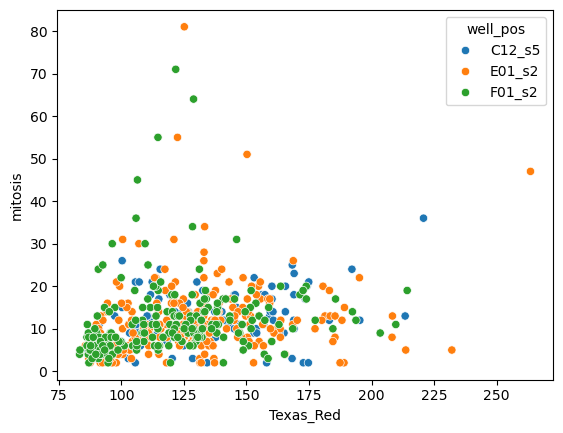

In [2]:
import sys, os
from pathlib import Path
# import napari # type: ignore
import numpy as np
import pandas as pd
# import trackpy as tp
# from scipy import ndimage as ndi
import matplotlib.pyplot as plt
plt.ion()
import seaborn as sns

sys.path.append('/Users/ajitj/Google Drive/ImageAnalysis/cell_analysis')
import cellaap_analysis
m3 = pd.read_excel('/Users/ajitj/Desktop/RPE1-U2OS/M3_compiled.xlsx')
m6 = pd.read_excel('/Users/ajitj/Desktop/RPE1-U2OS/M6_compiled.xlsx')

# Remove 0's and drop the categorical column
m3 = m3[m3.Texas_Red>0].copy()
sns.scatterplot(x = "Texas_Red", y="mitosis", hue="well_pos", data=m3)
m3.sort_values(by="Texas_Red", inplace=True)
m3.drop(columns=["well_pos"], inplace=True)
m3.head()

m6 = m6[m6.Texas_Red>0].copy()
m6.sort_values(by="Texas_Red", inplace=True)
m6.drop(columns=["well_pos"], inplace=True)
m6.head()

Examine the dose-response curves in the Chen et al. paper. To clarify the trend in the data, we bin the cells according to how much mCherry (eSAC) they have and the calculate the mean value in each bin. These means are overlaid on the raw data. The fits are performed on these mean values because they summarize the trend in the data.

In [3]:
from scipy.optimize import curve_fit
# The equation for a 4-parameter sigmoid. This is what we used
# to fit the dose-response data in the paper.

def sigmoid_4par(x, base, top, exponent, ec50):

    return base + (top - base)*(x**exponent)/(x**exponent+ec50**exponent)

In [41]:
means

,Unnamed: 0.1,Unnamed: 0,particle,cell_area,mito_start,mitosis,Texas_Red,Texas_Red_corr,Texas_Red_int_corr,GFP,GFP_bkg_corr,GFP_int_corr
labels,,,,,,,,,,,,
"(85.255, 89.255]",106.607143,106.607143,255.285714,1633.150678,45.785714,6.071429,87.394619,128.436994,0.952328,118.429617,651.325445,0.946366
"(89.255, 93.255]",121.346939,121.346939,349.142857,1515.986466,65.632653,7.734694,91.274650,136.308158,0.962914,120.632639,624.155740,0.949149
"(93.255, 97.255]",135.550000,135.550000,373.400000,1478.301470,63.275000,6.575000,95.112493,136.716266,0.966014,120.840671,631.231659,0.956300
"(97.255, 101.255]",149.968750,149.968750,523.062500,1330.143726,47.062500,9.875000,99.075919,132.280187,0.954940,120.830924,625.865939,0.956032
"(101.255, 105.255]",146.117647,146.117647,416.117647,1396.024504,37.705882,9.058824,103.632063,125.896164,0.952900,118.812193,624.164944,0.941962
"(105.255, 109.255]",87.750000,87.750000,244.464286,1498.298627,49.642857,12.928571,107.146817,123.323634,0.944988,122.678127,622.875175,0.947586
"(109.255, 113.255]",134.760000,134.760000,441.080000,1480.322874,41.280000,12.480000,111.087628,123.320286,0.951404,123.312955,638.961903,0.950294
"(113.255, 117.255]",131.034483,131.034483,294.517241,1450.316431,61.206897,14.172414,114.863465,128.799085,0.957717,121.993452,623.149531,0.946667
"(117.255, 121.255]",129.687500,129.687500,373.468750,1401.551467,47.687500,12.343750,119.499668,128.639012,0.955497,123.687231,634.024252,0.953529


/var/folders/kj/x0_bcbmd4jv3m3bf3430kc2r0000gr/T/ipykernel_59512/2655541802.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgs = m3.groupby("labels").mean()
/var/folders/kj/x0_bcbmd4jv3m3bf3430kc2r0000gr/T/ipykernel_59512/2655541802.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = m3.groupby("labels").std()
/var/folders/kj/x0_bcbmd4jv3m3bf3430kc2r0000gr/T/ipykernel_59512/2655541802.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

Text(0, 0.5, 'Time in mitosis (x10 minutes)')

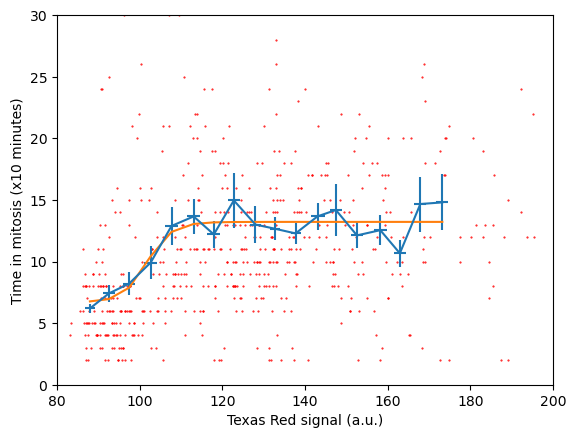

In [36]:
# pd.cut function returns a label vector with the label being the bin 
# that the row value belongs to.
binsize = 5
binrange = np.arange(m3.Texas_Red.min()+ binsize//2, 
                     180, binsize)

labels, bins = pd.cut(m3.Texas_Red, binrange, retbins=True)
m3["labels"] = labels
f, a = plt.subplots()
a.plot(m3.Texas_Red, m3.mitosis, 'r.', markersize= 1)
avgs = m3.groupby("labels").mean()
stds = m3.groupby("labels").std()
n = m3.groupby("labels").count()
# a.plot(avgs.Texas_Red, avgs.mitosis, 'bo', markersize=3)
a.errorbar(avgs.Texas_Red, avgs.mitosis, 
           yerr=stds.mitosis/np.sqrt(n.mitosis), xerr=stds.Texas_Red)
fits, _ = curve_fit(sigmoid_4par, avgs.Texas_Red, avgs.mitosis, 
                    p0 = [avgs.Texas_Red.min(), avgs.Texas_Red.max(),
                          3, (avgs.Texas_Red.min() + avgs.Texas_Red.max())/ 2])

a.plot(avgs.Texas_Red, sigmoid_4par(avgs.Texas_Red,
                                       fits[0], fits[1], fits[2], fits[3]), '-')
plt.ylim([0, 30])
plt.xlim([80,200])
plt.xlabel('Texas Red signal (a.u.)')
plt.ylabel('Time in mitosis (x10 minutes)')

In [37]:
fits

array([  6.7244178 ,  13.21679677,  34.78021819, 101.83400553])

/var/folders/kj/x0_bcbmd4jv3m3bf3430kc2r0000gr/T/ipykernel_89342/3299672843.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = m6.groupby("labels").mean()


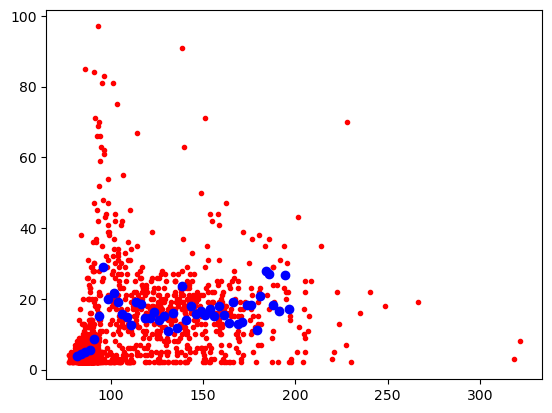

In [3]:

labels, bins = pd.cut(m6.Texas_Red,np.arange(80, 160, 2.5),retbins=True)
m6["labels"] = labels

plt.plot(m6.Texas_Red, m6.mitosis, 'r.')
means = m6.groupby("labels").mean()
plt.plot(means.Texas_Red, means.mitosis, 'bo')